In [ ]:
#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
#-------------------youtube vide linki (https://youtu.be/4aJLlBkb7Sc)-----------------------
#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
# veriyi işlemek için pandas ve diğer grafik/ML kütüphanelerini yükleyip Google Drive’a bağlanıyoruz.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#veri setini DataFrame’e alıp yapıyı görmek için ilk birkaç satır
housing_prices = pd.read_csv('/content/drive/MyDrive/housing.csv')
housing_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


longitude->   Konutun doğu-batı eksenindeki coğrafi konumunu gösteren boylam derecesi.

latitude->    Konutun kuzey-güney eksenindeki coğrafi konumunu gösteren enlem derecesi.

housing_median_age:->   Bölgedeki evlerin ortanca yaşı (yıl cinsinden).

total_rooms-> O bölgedeki tüm konutlardaki toplam oda sayısı.

total_bedrooms->     O bölgedeki tüm konutlardaki toplam yatak odası sayısı.

population->     O bölgedeki yaşayan toplam insan sayısı.

households->  O bölgedeki hanehalkı sayısı (ev olarak değerlendirilen grup sayısı).

median_income->  Hanelerin ortanca yıllık gelir düzeyi (normalleştirilmiş bir değer).

median_house_value->  Bölgedeki konut fiyatlarının ortanca değeri (USD).

ocean_proximity->  Bölgenin okyanusa ne kadar yakın olduğunu sınıflandıran kategorik etiket (ör. NEAR BAY, INLAND).

In [46]:
housing_prices.shape

(20640, 10)

In [47]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
housing_prices.isnull().values.any()

np.True_

In [49]:
housing_prices.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [50]:
#total_bedrooms sütununda boş bırakılmış satırları kaldırarak eksik veriyi temizliyoruz
housing_prices.dropna(subset=['total_bedrooms'], inplace=True)

In [51]:
# Fiyat sırasına göre en ucuz ve en pahalı 5 bölgeyi alalım
cheapest = housing_prices.nsmallest(5, 'median_house_value')
most_expensive = housing_prices.nlargest(5, 'median_house_value')

display(cheapest[['median_house_value', 'median_income', 'total_rooms', 'ocean_proximity']])
display(most_expensive[['median_house_value', 'median_income', 'total_rooms', 'ocean_proximity']])


,median_house_value,median_income,total_rooms,ocean_proximity
2521,14999.0,1.6607,255.0,INLAND
2799,14999.0,2.1000,619.0,INLAND
9188,14999.0,4.1932,803.0,INLAND
19802,14999.0,0.5360,98.0,INLAND
5887,17500.0,2.3667,493.0,<1H OCEAN


,median_house_value,median_income,total_rooms,ocean_proximity
89,500001.0,1.2434,249.0,NEAR BAY
459,500001.0,1.1696,609.0,NEAR BAY
493,500001.0,7.8521,1668.0,NEAR BAY
494,500001.0,9.3959,3726.0,NEAR BAY
509,500001.0,7.8772,2990.0,NEAR BAY


Çıkarımlar
Konum en baskın faktör: “NEAR BAY” olmak, oda sayısı ya da gelire bakılmaksızın bölgeyi en pahalıya taşıyor.

Gelir ve oda sayısı ikincil: İç bölgelerde düşük gelir+az oda → çok ucuz, ama körfez kenarında düşük gelir ve az oda bile piyasa fiyatını yukarı sabitliyor.

Modelde feature importance çıkarken ocean_proximity’nin en yüksek ağırlıkta olması beklenir; ardından median_income ve total_rooms gelir.

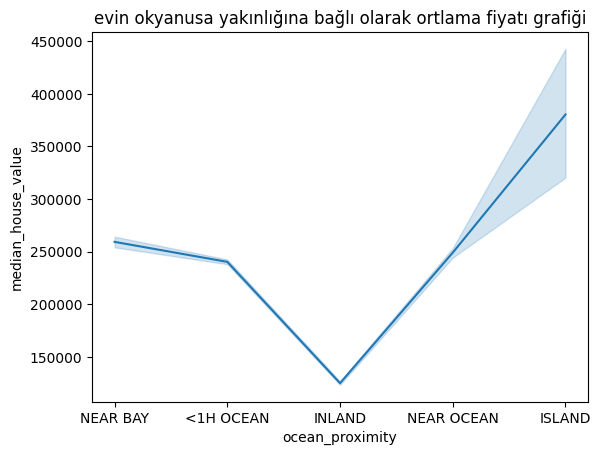

In [52]:
sns.lineplot(x="ocean_proximity",y="median_house_value",data=housing_prices)
plt.title("evin okyanusa yakınlığına bağlı olarak ortlama fiyatı grafiği")
plt.show()

 Konutların “okyanus/körfez yakınlığı” arttıkça o bölgede yaşayanların ortanca geliri de yükseliyor. Bu, modelde ocean_proximity değişkeninin güçlü bir feature olacağını ve fiyat tahminlerinde kritik rol oynayacağını gösteriyor.



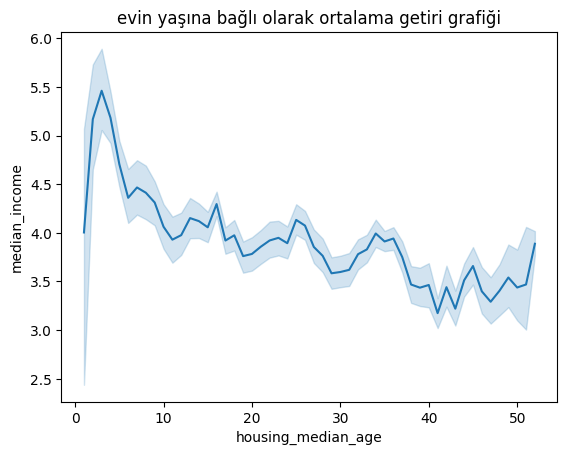

In [53]:
sns.lineplot(x="housing_median_age",y="median_income",data=housing_prices)
plt.title("evin yaşına bağlı olarak ortalama getiri grafiği")
plt.show()

Yeni konut projeleri genellikle yüksek gelirli bölgelerde konumlanırken, ev yaşı ilerledikçe gelir profili düşüp sonra sabitleniyor; çok çok eski yerleşimlerde ise muhtemelen yenileme/gentrifikasyon etkisiyle gelir bir nebze toparlanıyor.

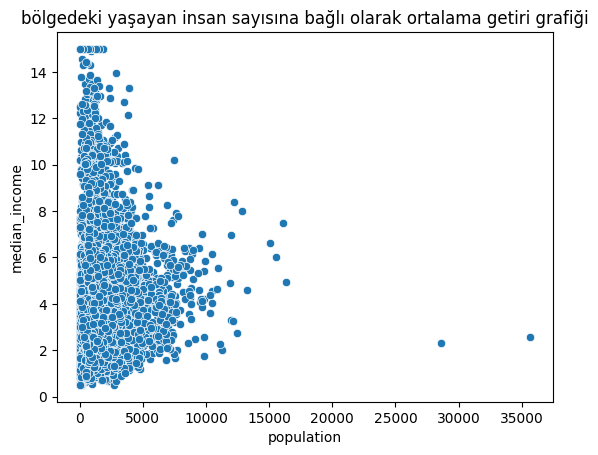

In [54]:
sns.scatterplot(x="population",y="median_income",data=housing_prices)
plt.title("bölgedeki yaşayan insan sayısına bağlı olarak ortalama getiri grafiği")
plt.show()

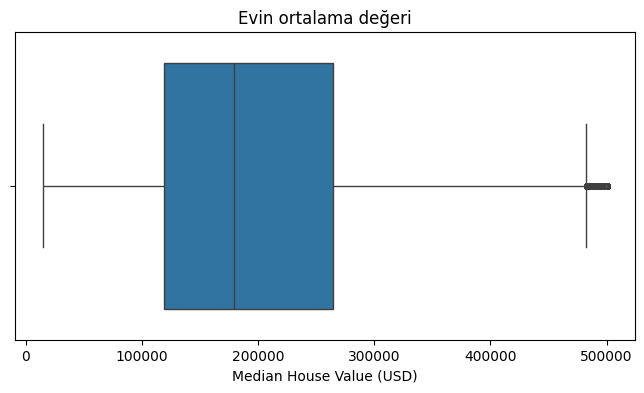

In [55]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='median_house_value',
    data=housing_prices,
    fliersize=4,
    linewidth=1
)
plt.title('Evin ortalama değeri')
plt.xlabel('Median House Value (USD)')
plt.show()

In [56]:
# medyan ev değerindeki uç fiyatları tespit edip satırları çıkararak temiz bir DataFrame oluşturma
def remove_outlier(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower = Q1-1.5*IQR
  upper=Q3+1.5*IQR
  df_celan=df[(df[column]>=lower) & (df[column]<=upper)]
  return df_celan

In [40]:
data =remove_outlier(housing_prices,"median_house_value")

In [22]:
le = LabelEncoder()
data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])

<ipython-input-22-b7b01717cde3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])


In [23]:
print(set(housing_prices['ocean_proximity']))
print(set(data['ocean_proximity']))

{'ISLAND', '<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY'}
{0, 1, 2, 3, 4}


In [24]:
# Burada makine öğrenimi modeline veriyi hazırlıyoruz
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [41]:
# veriyi eğitim ve test kümelerine ayırarak modelin genelleme performansını ölçüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)


In [26]:
# değer aralıkları çok farklı sütunları bir araya toplayıp aynı ölçeğe getirmek için liste hazırlıyoruz.

numeric_cols = [
    'longitude','latitude','housing_median_age',
    'total_rooms','total_bedrooms',
    'population','households','median_income'
]

In [27]:
scaler = StandardScaler()
#Bu kod bloğu, eğitim verisinin sayısal sütunlarını ortalaması 0, sapması 1 olacak şekilde ölçekliyor ve aynı işlemi teste uyguluyor.
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])  # Eğitim verisindeki sayısal sütunları önce ortalaması 0, sapması 1 olacak şekilde öğrenip dönüştürüyoruz
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])       # Aynı ölçekleme kurallarını test verisine uygulayarak tutarlı sonuç elde ediyoruz

In [28]:
print(X_train[numeric_cols].head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12663  -0.940754  1.314256           -1.063370     3.510184        3.472890   
18722  -1.389680  2.304754           -1.382845     0.589744        0.825443   
16596  -0.945742  0.891086           -1.143239    -0.474840       -0.592576   
7892    0.750200 -0.829498           -0.823764    -0.085448       -0.394435   
10287   0.869914 -0.829498           -0.424421    -0.118283       -0.442180   

       population  households  median_income  
12663    3.705691    3.299528      -0.698347  
18722    0.403378    0.901628      -0.881371  
16596   -0.489495   -0.565074       0.644581  
7892    -0.123549   -0.303916       1.631625  
10287   -0.206239   -0.406797       1.513512  


In [29]:
# basit lineer regresyon modelimizi tanımlayıp eğitim verisiyle öğrenmesini sağlıyor.
lin_reg   = LinearRegression()
lin_reg.fit(X_train, y_train)             # X_train ve y_train kullanarak linear modeli eğittik

LinearRegression()

In [30]:
# eğitilmiş modelin test verisi için fiyat tahminlerini oluşturuyor.
# Test kümesinde tahmin yap
y_pred_lin  = lin_reg.predict(X_test)

In [31]:
# tahmin hatalarını sayısal olarak ölçüp modelin performansını değerlendiriyoruz.
mae_lin  = mean_absolute_error(y_test, y_pred_lin)   # Ortalama Mutlak Hata: tahminlerin gerçeklerden ortalama mutlak sapması
mse_lin  = mean_squared_error(y_test, y_pred_lin)    # Ortalama Kare Hata: hataların karelerinin ortalaması
rmse_lin = mse_lin ** 0.5                            # RMSE: MSE’nin karekökü, hatayı orijinal birimde verir
r2_lin   = r2_score(y_test, y_pred_lin)              # R²: Modelin hedef değişkendeki varyansın ne kadarını açıkladığı
print("Modelin MAE değeri:", mae_lin)
print("Modelin MSE değeri:", mse_lin)
print("Modelin RMSE değeri:", rmse_lin)
print("Modelin R² değeri:", r2_lin)

Modelin MAE değeri: 45374.06592004563
Modelin MSE değeri: 3650663603.2835965
Modelin RMSE değeri: 60420.721638222734
Modelin R² değeri: 0.5994944761601224


In [59]:
#  Manuel olarak bir mahallenin özelliklerini tanımlıyorum
# → sırasıyla: boylam, enlem, evlerin ortanca yaşı, toplam oda sayısı,
#   toplam yatak odası sayısı, nüfus, hanehalkı sayısı, ortanca gelir, okyanusa yakınlık kodu
veri_girisi = (-122.23, 37.88, 41, 880, 129, 322, 126, 8.3252, 1)

arr = np.array(veri_girisi)

#  Modelin beklediği formata getiriyorum: 1 satır × n sütun
arr = arr.reshape(1, -1)

#  İlk 8 sütun sayısal değerler olduğu için önceden öğrendiğimiz scaler ile dönüştürüyoruz
#    Böylece tüm özellikler aynı ölçek aralığında olur ve model bunları dengeli kullanır
arr[:, :8] = scaler.transform(arr[:, :8])

# Artık hazır olan bu tek satırlık veriyi modele verip tahmin alıyorum
tahmin = lin_reg.predict(arr)[0]

# Sonucu ekrana basıyorum
print(f"Tahmin edilen medyan ev fiyatı: {tahmin:.0f} USD")

Tahmin edilen medyan ev fiyatı: 397155 USD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
